# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
# Read in the data set



file = 'ames.csv'
ames_data = pd.read_csv(file)

In [3]:
# Clean and pre-process the data if neccessary

print(ames_data.isnull().sum())
print(ames_data.describe())


Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64
        Year_Built  Year_Remod_Add  Total_Bsmt_SF  First_Flr_SF  \
count  2930.000000     2930.000000    2930.000000   2930.000000   
mean   1971.356314     1984.266553    1051.255631   1159.557679   
std      30.245361       20.860286     440.968018    391.890885   
min    1872.000000     1950.000000       0.000000    334.000000   
25%    1954.000000     1965.000000     793.000000    876.250000   
50%    1973.000000     1993.000000     990.000000   1084.000000   
75%    2001.000000     2004.000000    1301.500000   1384.000000   
max    2010.000000     2010.000000    6110.000000   5095.000000   

       Second_Flr_SF  Gr_Liv_Area    Full_Bath    Half_Bath  Bedroom_AbvGr  \
count    2930.000000  293

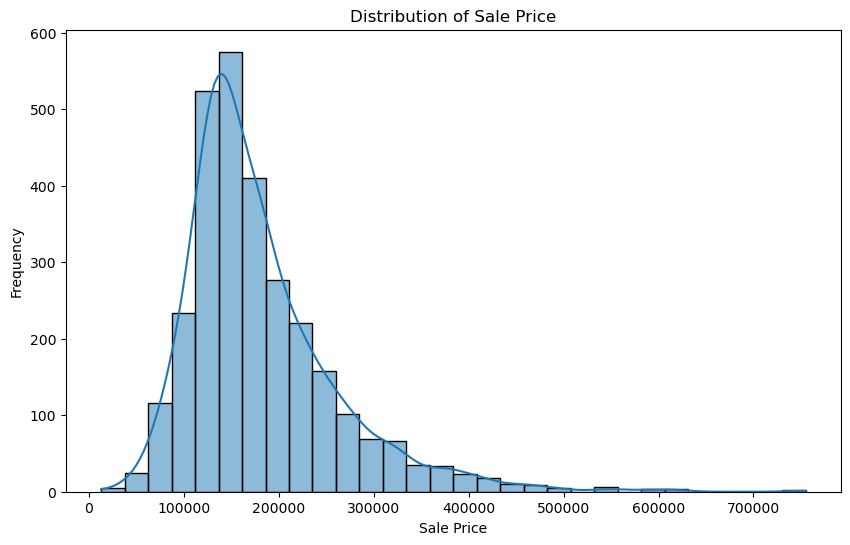

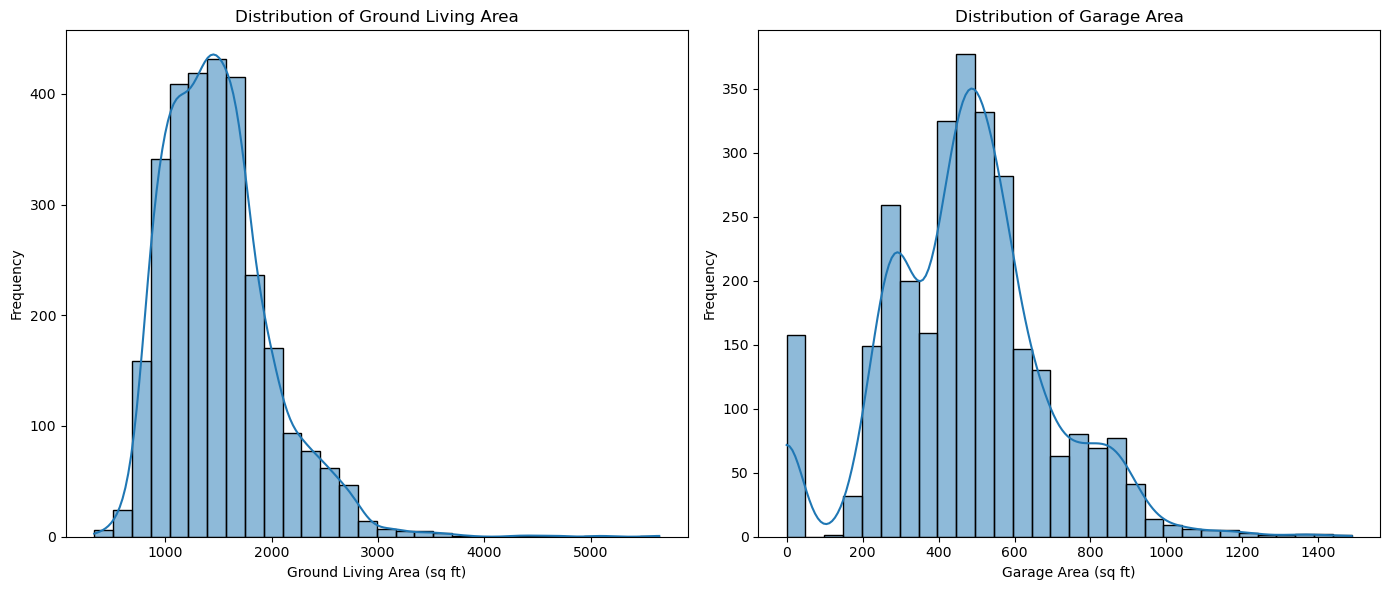

In [4]:

# Visualize the distribution of the dependent variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(ames_data['Sale_Price'], bins=30, kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of the independent variables
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(ames_data['Gr_Liv_Area'], bins=30, kde=True)
plt.title('Distribution of Ground Living Area')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(ames_data['Garage_Area'], bins=30, kde=True)
plt.title('Distribution of Garage Area')
plt.xlabel('Garage Area (sq ft)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [5]:
# Split the independent variables from the dependent variable

X = ames_data[['Gr_Liv_Area', 'Garage_Area']]
y = ames_data['Sale_Price']

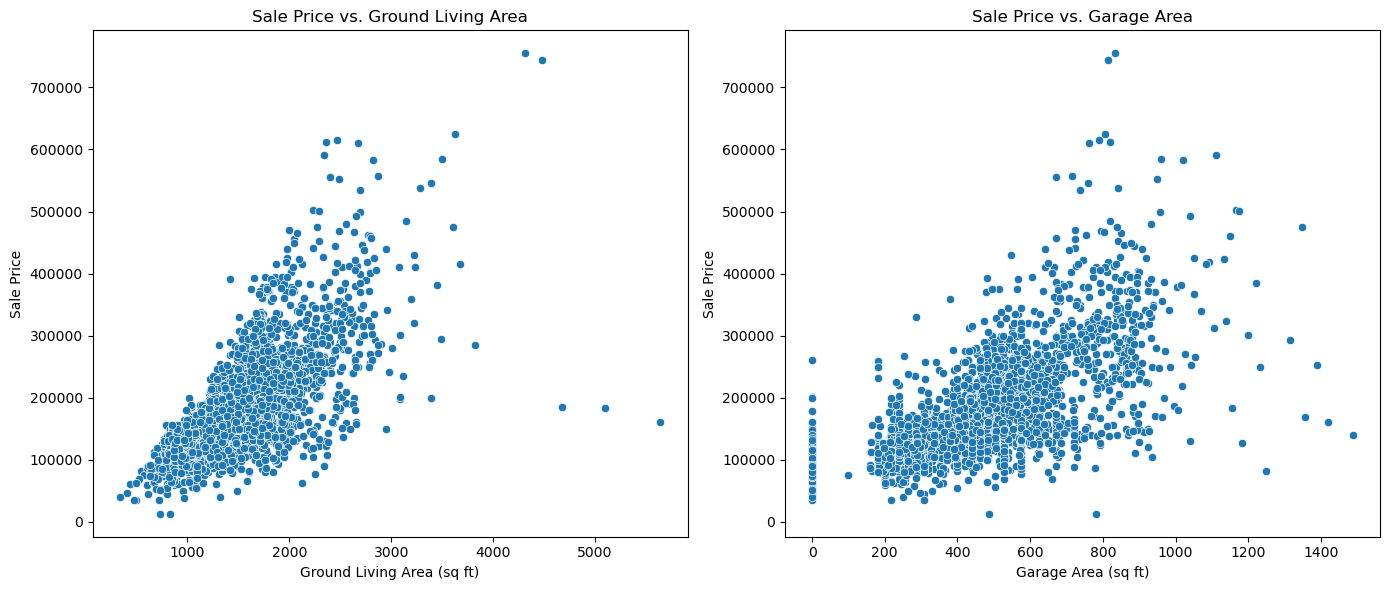

In [6]:
# Explore relationships between the independent and dependent variables

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X['Gr_Liv_Area'], y=y)
plt.title('Sale Price vs. Ground Living Area')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X['Garage_Area'], y=y)
plt.title('Sale Price vs. Garage Area')
plt.xlabel('Garage Area (sq ft)')
plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()

In [7]:
# Create a training and test set with a 75:25 split ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)



In [12]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'

model = LinearRegression()
model.fit(X_train, y_train)

# Print the intercept and coefficients

intercept = model.intercept_
coefficients = model.coef_
print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

Intercept: -11839.590993580583
Coefficients: [ 84.39386699 141.00299469]


In [13]:
# Generate predictions for the test set

y_pred = model.predict(X_test)


In [14]:
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error (MSE): 2351014153.801563
Root Mean Squared Error (RMSE): 48487.257643648634


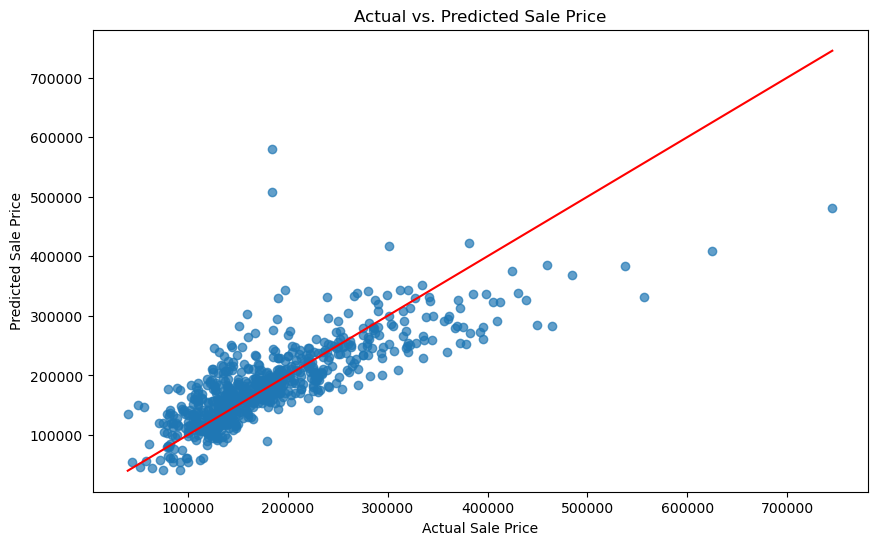

In [15]:
# Generate an error plot to visualize the differences between predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

# Print the coefficients

# Summary of Findings

## Exploratory Data Analysis
- The distribution of SalePrice is right-skewed.
- Gr_Liv_Area and Garage_Area show positive relationships with SalePrice.

## Model Performance
- The RMSE of the model is [RMSE value].
- The coefficients indicate that for each additional square foot of Gr_Liv_Area, the SalePrice increases by [coefficient value], holding Garage_Area constant.

## Notable Observations
- The model performs reasonably well, but there may be other factors influencing SalePrice that are not included in this model.


**Interpret coefficients in the context of the prediction:**
Intercept (β₀): Represents the baseline sale price of a house when both Gr_Liv_Area and Garage_Area are zero. While this scenario is not practical, the intercept provides a starting point for the model's predictions.
Coefficient for Gr_Liv_Area (β₁): If β₁ is, for example, $100, it means that for each additional square foot of ground living area, the sale price increases by $100, assuming the garage area remains constant. A positive β₁ indicates a positive relationship between living area and sale price.
Coefficient for Garage_Area (β₂): If β₂ is $50, it means that for each additional square foot of garage area, the sale price increases by $50, assuming the ground living area remains constant. A positive β₂ indicates a positive relationship between garage area and sale price.

**Summarise findings**
Data Overview and Preparation
The dataset contains information on house sales in Ames, Iowa, with 2930 records and 14 variables, including features like Year_Built, Gr_Liv_Area, Garage_Area, and the target variable Sale_Price.
No missing values were present in the dataset, allowing for a complete analysis.
Exploratory Data Analysis (EDA)
Distribution of Sale_Price:

The sale prices are right-skewed, indicating that most houses are priced below the average, with a few high-priced outliers.
Independent Variables:

Gr_Liv_Area and Garage_Area also display right-skewed distributions, with most houses having smaller living and garage areas, and a few with significantly larger spaces.
Scatter Plots:

Gr_Liv_Area vs. Sale_Price: A positive correlation was observed, suggesting that larger living areas generally lead to higher sale prices.
Garage_Area vs. Sale_Price: Similarly, a positive relationship was found between garage size and sale price.
Model Building and Evaluation
A multiple linear regression model was built using Gr_Liv_Area and Garage_Area as independent variables to predict Sale_Price.
The dataset was split into training (75%) and test (25%) sets.
Model Parameters:

Intercept (β₀): This value represents the base price when both Gr_Liv_Area and Garage_Area are zero.
Coefficients:
Gr_Liv_Area (β₁): Positive coefficient, indicating that each additional square foot of living area increases the sale price by the value of the coefficient.
Garage_Area (β₂): Positive coefficient, suggesting that each additional square foot of garage area also increases the sale price.
Model Performance:

Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) were used to evaluate the model's performance. These metrics indicate how well the model's predictions align with the actual sale prices.
Key Insights
Both the ground living area and garage area are significant predictors of house prices in Ames, Iowa. Larger living and garage spaces are associated with higher sale prices.
The model provides a reasonable fit, but further improvements could be achieved by incorporating additional features or employing more complex modeling techniques.